In [185]:
# Import Libraries
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import BoundaryNorm
import pandas as pd

In [186]:
# Sanity check

kb_data = pd.read_csv('Collected_Data.csv')
kb_data.head()

,Time (Minutes),Trial 1,Trial 2,Trial 3,Trial 4,Trial 5,Trial 6,Trial 7,Trial 8,Trial 9,...,Trial 11,Trial 12,Trial 13,Trial 14,Trial 15,Trial 16,Trial 17,Trial 18,Trial 19,Trial 20
0,0.00,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
1,0.25,1.0,1.0,2.0,1,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0,0.0,0.0,0,2.0,0.0
2,0.50,3.0,2.0,2.0,1,3.0,4.0,3.0,0.0,3.0,...,3.0,0.0,1.0,1.0,0,2.0,1.0,0,2.0,3.0
3,0.75,3.0,3.0,3.0,2,3.0,4.0,4.0,0.0,3.0,...,3.0,1.0,1.0,1.0,0,2.0,2.0,0,2.0,3.0
4,1.00,3.0,4.0,4.0,4,4.0,4.0,4.0,2.0,3.0,...,4.0,3.0,2.0,2.0,0,2.0,2.0,1,2.0,3.0


Numerical Calculations

In [187]:
## INDIVIDUAL STATISTICS

# Note: Not sure how useful these are but I figured lets include them anyways

individual_statistics = {
    'trial_no': [],
    'sample_count': [],
    'mean': [],
    'median': [],
    'std': [],
    'min': [],
    '25%': [],
    '50%': [],
    '75%': [],
    'max': []
}

for col in kb_data.columns[1:]:
    arr = kb_data[col]
    arr_clean = arr[~np.isnan(arr)]  # Remove any NaNs
    individual_statistics['trial_no'].append(col)
    individual_statistics['sample_count'].append(arr_clean.size)
    individual_statistics['mean'].append(np.mean(arr_clean))
    individual_statistics['median'].append(np.median(arr_clean))
    individual_statistics['std'].append(np.std(arr_clean))
    individual_statistics['min'].append(np.min(arr_clean))
    individual_statistics['25%'].append(np.percentile(arr_clean, 25))
    individual_statistics['50%'].append(np.percentile(arr_clean, 50))
    individual_statistics['75%'].append(np.percentile(arr_clean, 75))
    individual_statistics['max'].append(np.max(arr_clean))

statistics_df = pd.DataFrame(individual_statistics)
statistics_df.head(20) # output all of the table

,trial_no,sample_count,mean,median,std,min,25%,50%,75%,max
0,Trial 1,26,5.038462,5.0,2.102760,0.0,4.00,5.0,6.75,8.0
1,Trial 2,25,5.960000,7.0,2.087678,0.0,7.00,7.0,7.00,7.0
2,Trial 3,27,5.481481,6.0,2.006847,0.0,5.00,6.0,6.00,9.0
3,Trial 4,31,6.516129,8.0,2.613501,0.0,5.50,8.0,8.00,9.0
4,Trial 5,30,5.133333,5.0,1.647894,0.0,4.00,5.0,6.00,7.0
5,Trial 6,27,4.629630,4.0,1.494388,0.0,4.00,4.0,6.00,6.0
6,Trial 7,21,6.809524,8.0,2.753682,0.0,8.00,8.0,8.00,9.0
7,Trial 8,26,4.730769,5.0,2.520038,0.0,3.25,5.0,7.00,8.0
8,Trial 9,30,5.200000,5.5,2.357965,0.0,3.00,5.5,7.00,8.0
9,Trial 10,29,4.896552,4.0,2.468349,0.0,3.00,4.0,8.00,9.0


In [188]:
## COMBINE ALL TRIALS INTO ONE FOR EASE OF USE

combined_df = kb_data.melt(
    id_vars='Time (Minutes)',
    var_name='Trial',
    value_name='Value'
)

combined_df = combined_df.dropna(subset=['Value'])
combined_df['Value'] = combined_df['Value'].astype(int)

combined_df.head()

,Time (Minutes),Trial,Value
0,0.00,Trial 1,0
1,0.25,Trial 1,1
2,0.50,Trial 1,3
3,0.75,Trial 1,3
4,1.00,Trial 1,3


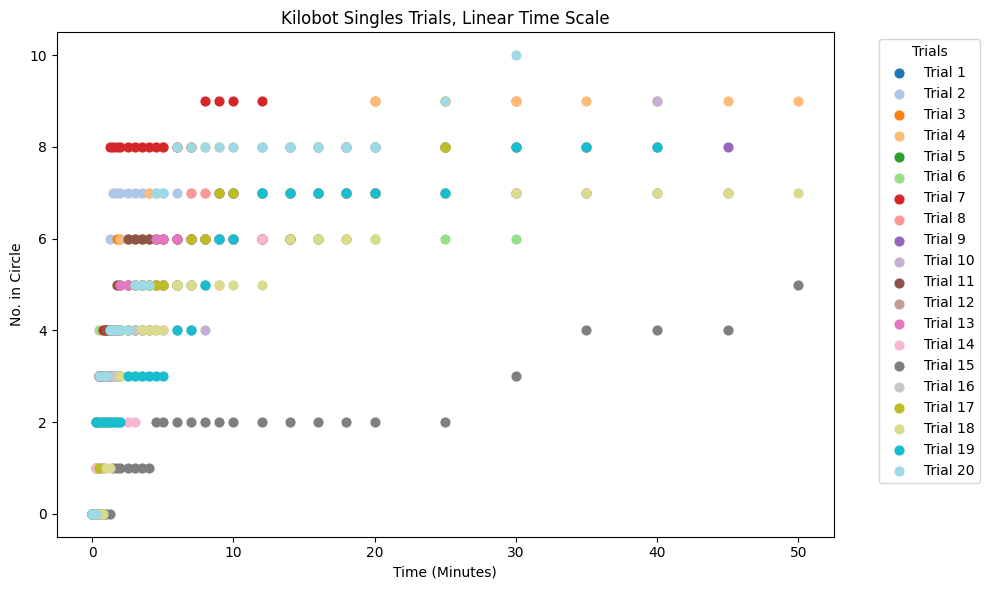

In [189]:
## THIS GRAPH SHOWS EACH DATA ENTRY IN THE CSV COLOR CODED BY TRIAL

trial_cols = [col for col in kb_data.columns if col.startswith('Trial')]

cmap = plt.get_cmap('tab20', len(trial_cols))

plt.figure(figsize=(10, 6))
for i, col in enumerate(trial_cols):
    plt.scatter(
        kb_data['Time (Minutes)'],
        kb_data[col],
        label=col,
        color=cmap(i),
        s=40
    )

plt.xlabel('Time (Minutes)')
plt.ylabel('No. in Circle')
plt.title('Kilobot Singles Trials, Linear Time Scale')
plt.legend(
    title='Trials',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    ncol=1
)
plt.tight_layout()
plt.show()

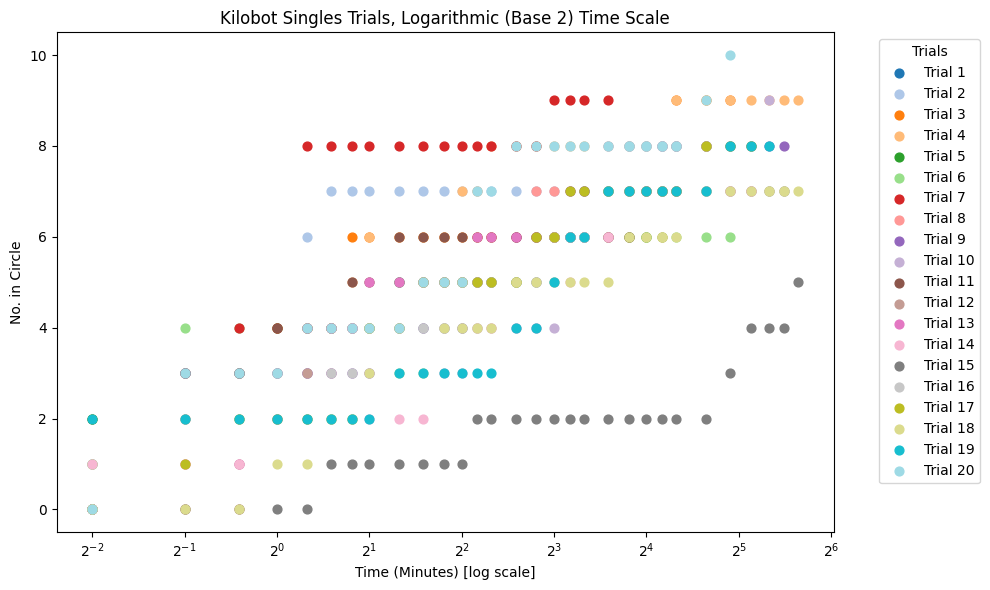

In [190]:
## SCALING THE X AXIS TO LOG SCALE

df_pos = kb_data[kb_data['Time (Minutes)'] > 0].copy()

trial_cols = [col for col in kb_data.columns if col.startswith('Trial')]

cmap = plt.get_cmap('tab20', len(trial_cols))

plt.figure(figsize=(10, 6))
for i, col in enumerate(trial_cols):
    plt.scatter(
        df_pos['Time (Minutes)'],
        df_pos[col],
        label=col,
        color=cmap(i),
        s=40
    )

plt.xscale('log', base = 2)

plt.xlabel('Time (Minutes) [log scale]')
plt.ylabel('No. in Circle')
plt.title('Kilobot Singles Trials, Logarithmic (Base 2) Time Scale')
plt.legend(
    title='Trials',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.tight_layout()
plt.show()

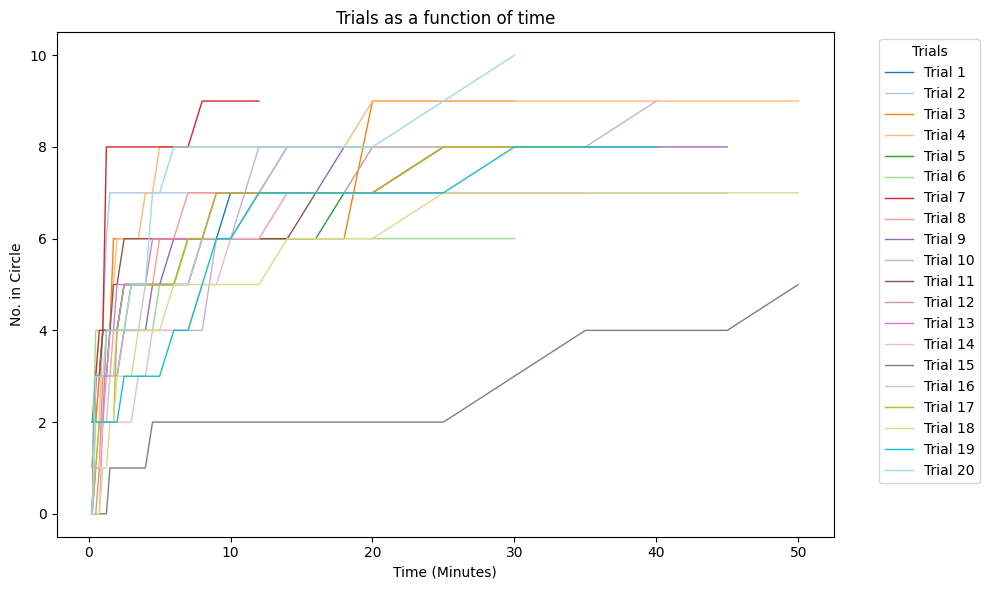

In [191]:
## REPLACE THE DOTS WITH A LINE TO SEE TREND BETTER

df_pos = kb_data[kb_data['Time (Minutes)'] > 0].copy()

trial_cols = [col for col in kb_data.columns if col.startswith('Trial')]

cmap = plt.get_cmap('tab20', len(trial_cols))

plt.figure(figsize=(10, 6))
for i, col in enumerate(trial_cols):
    plt.plot(
        df_pos['Time (Minutes)'],
        df_pos[col],
        label=col,
        color=cmap(i),
        linestyle='-',
        linewidth=1
    )


plt.xlabel('Time (Minutes)')
plt.ylabel('No. in Circle')
plt.title('Trials as a function of time')
plt.legend(
    title='Trials',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.tight_layout()
plt.show()

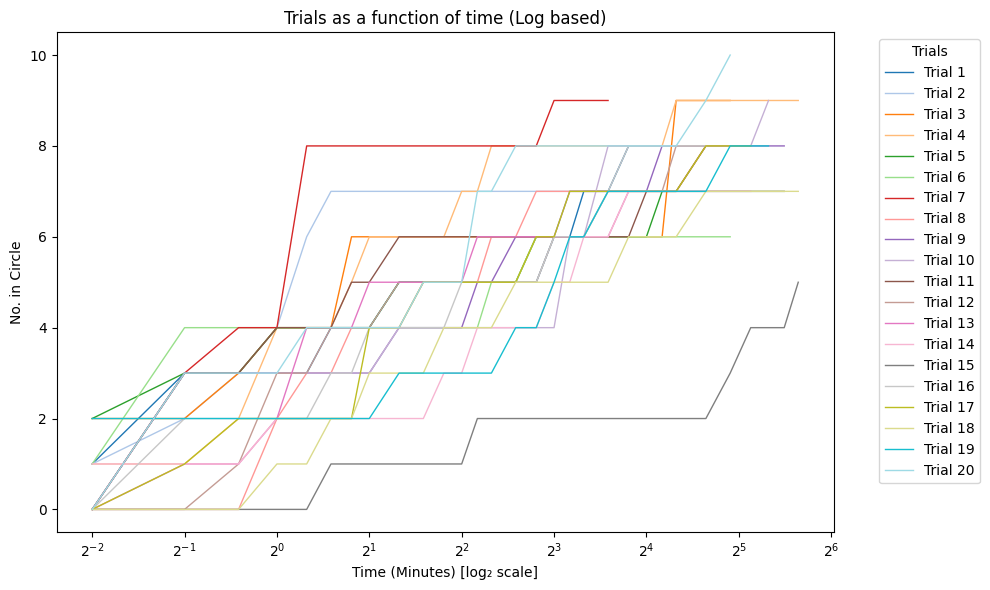

In [192]:
## GRAPHING WITH A LOGARITHMICALLY SCALED X AXIS

df_pos = kb_data[kb_data['Time (Minutes)'] > 0].copy()

trial_cols = [col for col in kb_data.columns if col.startswith('Trial')]

cmap = plt.get_cmap('tab20', len(trial_cols))

plt.figure(figsize=(10, 6))
for i, col in enumerate(trial_cols):
    plt.plot(
        df_pos['Time (Minutes)'],
        df_pos[col],
        label=col,
        color=cmap(i),
        linestyle='-',
        linewidth=1
    )

plt.xscale('log', base=2) 

plt.xlabel('Time (Minutes) [log₂ scale]')
plt.ylabel('No. in Circle')
plt.title('Trials as a function of time (Log based)')
plt.legend(
    title='Trials',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.tight_layout()
plt.show()

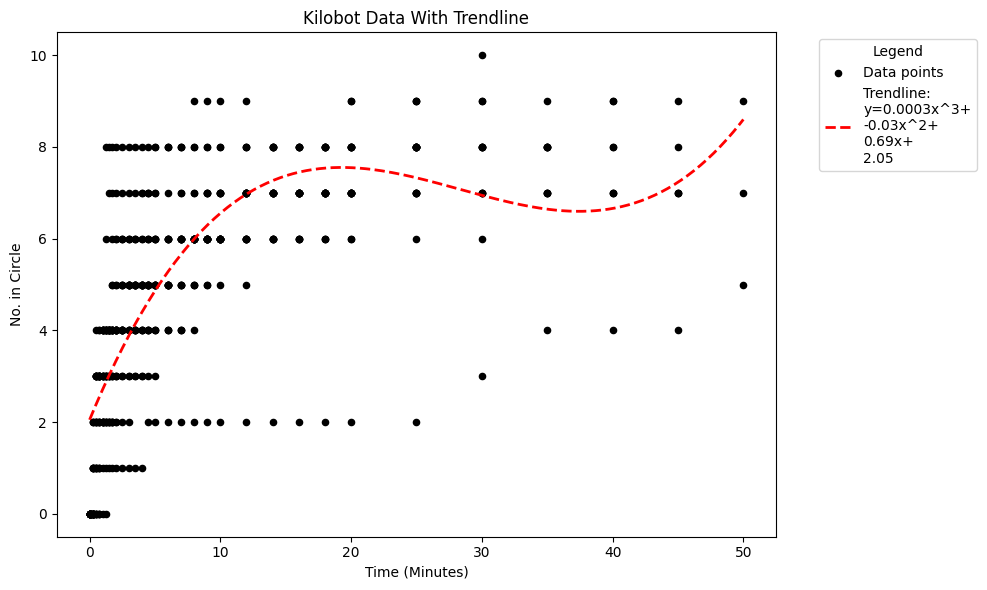

In [193]:
## GRAPH POLYNOMIAL BEST OF FIT LINE

x = combined_df['Time (Minutes)']
y = combined_df['Value']
coeffs = np.polyfit(x, y, deg=3)
trend = np.poly1d(coeffs)

plt.figure(figsize=(10, 6))

plt.scatter(
    combined_df['Time (Minutes)'],
    combined_df['Value'],
    color='k',
    s=20,
    label='Data points'
)

x_vals = np.linspace(x.min(), x.max(), 200)
plt.plot(
    x_vals,
    trend(x_vals),
    color='red',
    linestyle='--',
    linewidth=2,
    label=f'Trendline: \ny={coeffs[0]:.4f}x^3+\n{coeffs[1]:.2f}x^2+\n{coeffs[2]:.2f}x+\n{coeffs[3]:.2f}'
)

plt.xlabel('Time (Minutes)')
plt.ylabel('No. in Circle')
plt.title('Kilobot Data With Trendline')
plt.legend(
    title='Legend',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.tight_layout()
plt.show()

I dont like the polynomial, I think intuitively a logarithmic function would be a better fit

/tmp/ipykernel_49377/786039644.py:4: RuntimeWarning: divide by zero encountered in log
  return a * np.log(x) + b
/tmp/ipykernel_49377/786039644.py:9: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(log_func, x, y)


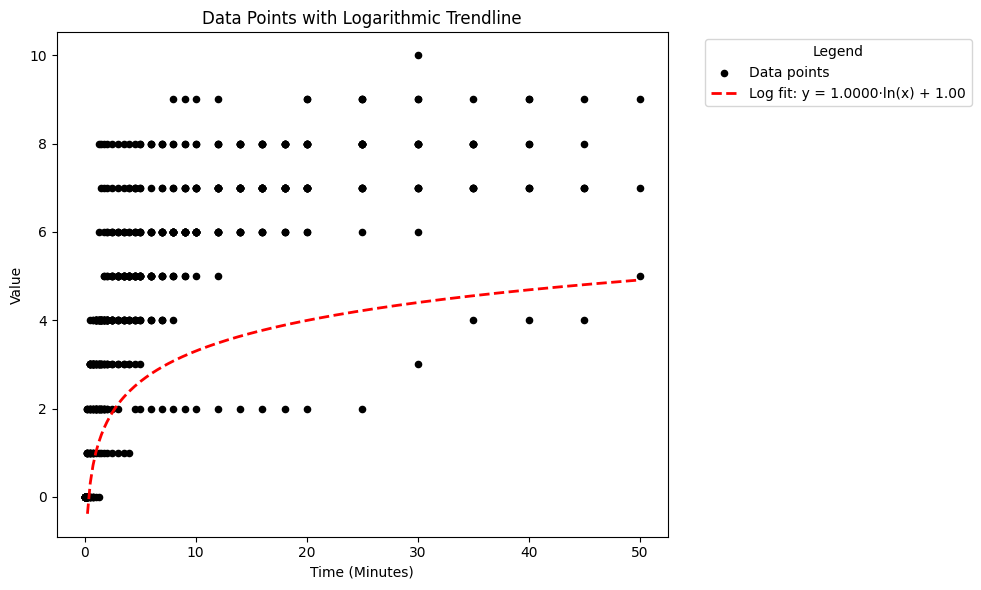

In [ ]:
from scipy.optimize import curve_fit

## LOG BEST OF FIT LINE

def log_func(x, a, b):
    return a * np.log(x) + b

x = combined_df['Time (Minutes)'].values
y = combined_df['Value'].values

popt, pcov = curve_fit(log_func, x, y)
a, b = popt

x_vals = (np.linspace(x.min(), x.max(), 200))[1:] # remove the first element to prevent log(0)
y_vals = log_func(x_vals, a, b)

plt.figure(figsize=(10, 6))
plt.scatter(x, y,
            color='k',
            s=20,
            label='Data points')

plt.plot(x_vals, y_vals,
         color='red',
         linestyle='--',
         linewidth=2,
         label=f'Log fit: y = {a:.4f}·ln(x) + {b:.2f}')

plt.xlabel('Time (Minutes)')
plt.ylabel('Value')
plt.title('Data Points with Logarithmic Trendline')
plt.legend(title='Legend',
           bbox_to_anchor=(1.05, 1),
           loc='upper left')
plt.tight_layout()
plt.show()

Not a fan of this, but it intuitively looks like a logarithmic fit to me...

Removing the outlier (Trial 15):

In [195]:
## REMOVE TRIAL 15, AN OBVIOUS OUTLIER

kb_data = kb_data.drop("Trial 15", axis=1)

combined_df = kb_data.melt(
    id_vars='Time (Minutes)',
    var_name='Trial',
    value_name='Value'
)

combined_df = combined_df.dropna(subset=['Value'])
combined_df['Value'] = combined_df['Value'].astype(int)

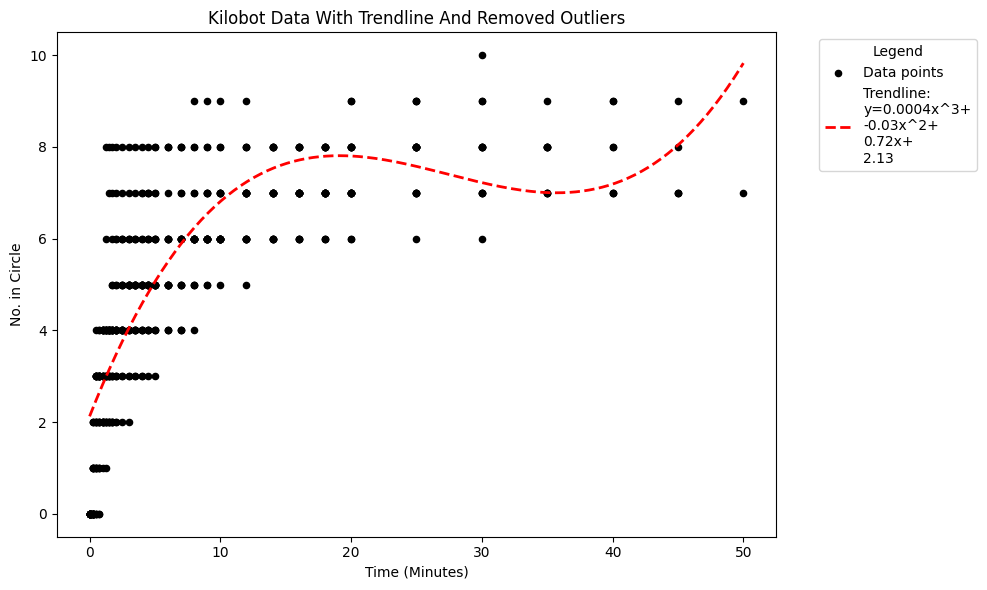

In [196]:
## GRAPH POLYNOMIAL WITH OUTLIER REMOVED

x = combined_df['Time (Minutes)']
y = combined_df['Value']
coeffs = np.polyfit(x, y, 3)
trend = np.poly1d(coeffs)

plt.figure(figsize=(10, 6))

plt.scatter(
    combined_df['Time (Minutes)'],
    combined_df['Value'],
    color='k',
    s=20,
    label='Data points'
)

x_vals = np.linspace(x.min(), x.max(), 200)
plt.plot(
    x_vals,
    trend(x_vals),
    color='red',
    linestyle='--',
    linewidth=2,
    label=f'Trendline: \ny={coeffs[0]:.4f}x^3+\n{coeffs[1]:.2f}x^2+\n{coeffs[2]:.2f}x+\n{coeffs[3]:.2f}'
)

plt.xlabel('Time (Minutes)')
plt.ylabel('No. in Circle')
plt.title('Kilobot Data With Trendline And Removed Outliers')
plt.legend(
    title='Legend',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.tight_layout()
plt.show()

Lets try logarithms again, maybe now it will perform better

/tmp/ipykernel_49377/786039644.py:4: RuntimeWarning: divide by zero encountered in log
  return a * np.log(x) + b
/tmp/ipykernel_49377/1170077784.py:4: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(log_func, x, y)


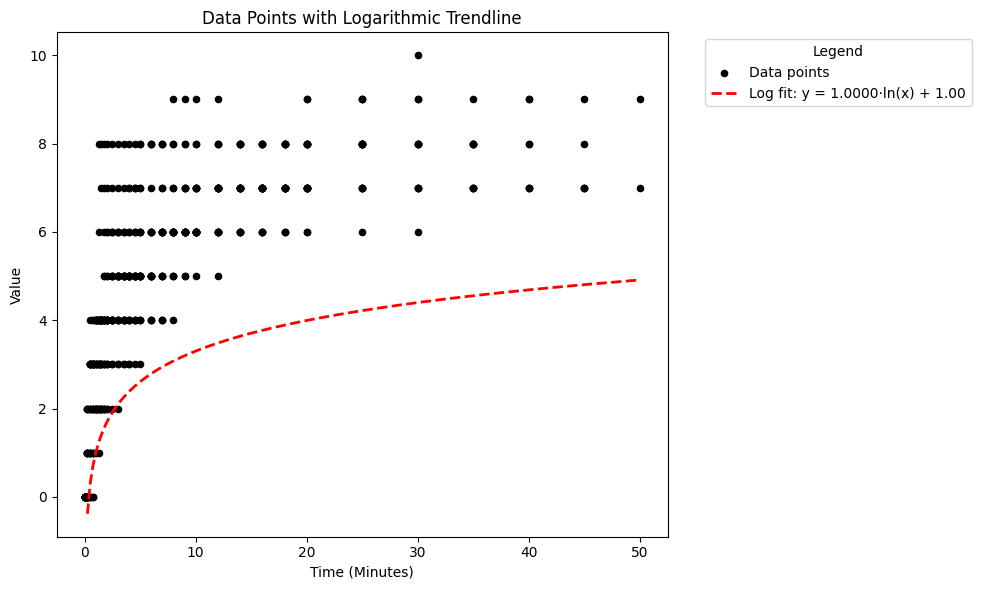

In [ ]:
## LOG BEST OF FIT - TAKE 2

x = combined_df['Time (Minutes)'].values
y = combined_df['Value'].values

popt, pcov = curve_fit(log_func, x, y)
a, b = popt

x_vals = (np.linspace(x.min(), x.max(), 200))[1:] # remove the first element to prevent log(0)
y_vals = log_func(x_vals, a, b)

plt.figure(figsize=(10, 6))
plt.scatter(x, y,
            color='k',
            s=20,
            label='Data points')

plt.plot(x_vals, y_vals,
         color='red',
         linestyle='--',
         linewidth=2,
         label=f'Log fit: y = {a:.4f}·ln(x) + {b:.2f}')

plt.xlabel('Time (Minutes)')
plt.ylabel('Value')
plt.title('Data Points with Logarithmic Trendline')
plt.legend(title='Legend',
           bbox_to_anchor=(1.05, 1),
           loc='upper left')
plt.tight_layout()
plt.show()

Still not performing well